# Encontrar las mejores barras de chocolate

Trabaja en una empresa importadora de alimentos especiales que quiere expandirse al mercado de barras de chocolate gourmet. Su jefe necesita que su equipo investigue este mercado para informar su acercamiento inicial a proveedores potenciales. Después de encontrar calificaciones valiosas de barras de chocolate en línea, debe explorar si las barras de chocolate con las calificaciones más altas comparten alguna característica que pueda ayudarlo a limitar su búsqueda de proveedores (por ejemplo, porcentaje de cacao, país de origen del grano, y otros etc.)

Tu desafío.

Cree un informe para resumir su investigación. Incluir:

- ¿Cuál es la calificación promedio por país de origen?
- ¿Cuántas barras se revisaron para cada uno de esos países?
- Cree gráficos para visualizar los hallazgos de las preguntas 1 y 2.
- ¿El origen del grano de cacao es un indicador de calidad?
- ¿Cómo se relaciona el contenido de cacao con la calificación? ¿Cuál es el contenido promedio de cacao para las barras con calificaciones más altas (más de 3,5)?
- Su investigación indica que algunos consumidores quieren evitar las barras con lecitina. Compare la calificación promedio de barras con y sin lecitina (L en los ingredientes).
- Resuma sus hallazgos.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Importar datos
df = pd.read_csv("data/chocolate_bars.csv")#le dices que lea el dataset
df.dropna(inplace=True)#Borrar los nulos 
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [35]:
df["bean_origin"].unique() #Data frame te da una tabla de exel
#df es una variable
#UNique saca los datos unicos o no repetidos




array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama',
       'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador',
       'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone',
       'Nigeria', 'U.S.A.', 'St.Vincent-Grenadines', 'Thailand', 'Tobago',
       'Sao Tome & Principe', 'Sumatra', 'El Salvador', 'Cameroon',
       'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

In [36]:
df["bean_origin"].mean
#   Mean promedio



<bound method Series.mean of 0                 Tanzania
1       Dominican Republic
2               Madagascar
3                     Fiji
4                Venezuela
               ...        
2525                 Blend
2526              Colombia
2527                 Blend
2528                 Congo
2529                Belize
Name: bean_origin, Length: 2443, dtype: object>

In [37]:
#1.¿Cuál es la calificación promedio por país de origen?
agrupadoratin =df.groupby(by="bean_origin").rating.mean().sort_values(ascending=False)
#Agrupa por pais
#que operacion va a hacer con todo el registro 
# Ordena descendentemente los promedios

agrupadoratin.head(10) #rating de los primeros 10 mejores

bean_origin
China                  3.500000
Sao Tome & Principe    3.500000
Solomon Islands        3.450000
Congo                  3.318182
Thailand               3.300000
Cuba                   3.291667
Vietnam                3.287671
Papua New Guinea       3.280612
Madagascar             3.270468
Haiti                  3.266667
Name: rating, dtype: float64

In [38]:
df[["manufacturer","bean_origin"]] #Sólo saque los datos de manufacturer y de bean origin

,manufacturer,bean_origin
0,5150,Tanzania
1,5150,Dominican Republic
2,5150,Madagascar
3,5150,Fiji
4,5150,Venezuela
...,...,...
2525,Zotter,Blend
2526,Zotter,Colombia
2527,Zotter,Blend
2528,Zotter,Congo


<AxesSubplot: xlabel='bean_origin'>

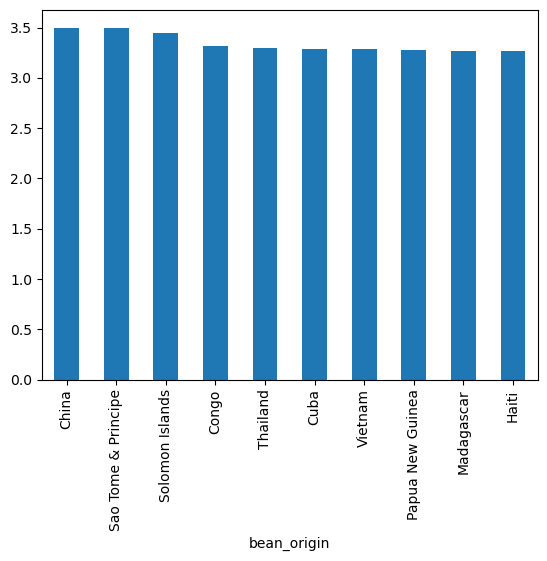

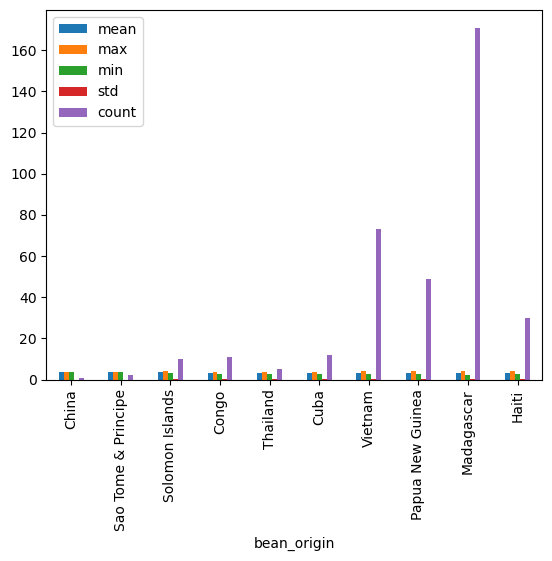

In [39]:

mediarating_pais = df.groupby(by="bean_origin")["rating"].agg(["mean","max","min","std","count"]).sort_values(by="mean", ascending=False)
mediarating_pais["mean"].head(10).plot(kind="bar")
mediarating_pais.head(10).plot(kind="bar")
#coud el numero de registros que da el pais
#sort_values ordena


In [40]:
#2.¿Cuántas barras se revisaron para cada uno de esos países?
#Cuantos registros hay por cada pais, no sacar la media 
bar_pais = df.groupby(by="bean_origin")["bar_name"].agg(["count"]).sort_values(by="count",ascending=False)
bar_pais
#utilizar value_counts --- Cuenta por ejemplo hay 10 de usa, y 5 de Italy


,count
bean_origin,
Venezuela,246
Peru,231
Dominican Republic,220
Ecuador,201
Madagascar,171
...,...
Suriname,1
Sumatra,1
Sulawesi,1


<AxesSubplot: ylabel='count'>

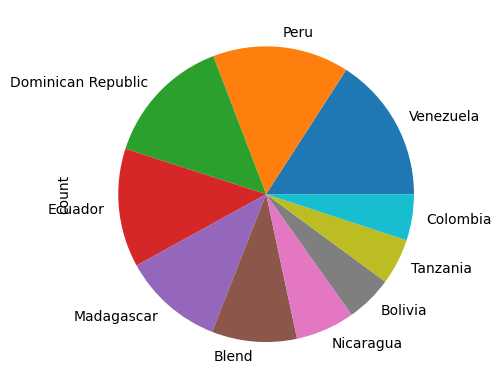

In [41]:
#2.-Cree gráficos para visualizar los hallazgos de las preguntas 1 y 2.
bar_pais.head(10)["count"].plot(kind="pie")

In [46]:
#3.-¿El origen del grano de cacao es un indicador de calidad?
#Correlacionar el grano de cacao con la calidad, 
#Considerar % de cacao se compara el origen de cacao 
quality_cacao = df.groupby(by="bean_origin")["cocoa_percent"].agg(["count"]).sort_values(by="count",ascending=False)
quality_cacao

AttributeError: 'DataFrameGroupBy' object has no attribute 'quality'

In [45]:
df[["cocoa_percent"]]


,cocoa_percent
0,76.0
1,76.0
2,76.0
3,68.0
4,72.0
...,...
2525,80.0
2526,75.0
2527,75.0
2528,70.0


In [29]:
df.head(10)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


In [30]:
#¿Cómo se relaciona el contenido de cacao con la calificación? 
#plt.scatter mientras aumenta el % aumenta el raiting, si aumenta uno o disminuye el otro
#correlacion, x y y 
#no correlacion
#coeficiente de correlacion de pirson 
#¿Cuál es el contenido promedio de cacao para las barras con calificaciones más altas (más de 3,5)?
#accediendo a rating, Filtrar los que tienen mas de 3.5,



In [31]:
mediarating_pais

,mean,max,min,std,count
bean_origin,,,,,
China,3.500000,3.50,3.50,NaN,1
Sao Tome & Principe,3.500000,3.50,3.50,0.000000,2
Solomon Islands,3.450000,4.00,3.00,0.307318,10
Congo,3.318182,3.75,2.75,0.318019,11
Thailand,3.300000,3.75,2.75,0.410792,5
...,...,...,...,...,...
Martinique,2.750000,2.75,2.75,NaN,1
Sierra Leone,2.750000,3.00,2.50,0.288675,4
Principe,2.750000,2.75,2.75,NaN,1


In [32]:

type(df["ingredients"][0])
df["ingredients"][0].__contains__("L") #Si la L #contains funciona para una sola columna funciones nativas de phyton

df["ingredients"].dropna(implace=True)#Borrar 


TypeError: Series.dropna() got an unexpected keyword argument 'implace'

In [ ]:
nuevo._contains_("L")

NameError: name 'nuevo' is not defined

In [ ]:
df.loc[df["company_location"] == "U.S.A", :] #Las que se encuentran en usa


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating


In [ ]:
contiene_lecitina= df["ingredients"].str.contains("L") #columnas contains 
contiene_lecitina

data_lecitina= df[contiene_lecitina]
#Busca en ingredientes si tiene L o lecitina y regresa en las columnas, es decir no hay L en estas columnas 

In [ ]:

notiene_lecitina = ~df["ingredients"].str.contains("L") #Saca los que no tiene l
notiene_lecitina
data_notienel = df[notiene_lecitina]

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [ ]:
df["contiene_L"]=contiene_lecitina #tiene true y false
df[df["contiene_L"]==False]
data_sinlecitina=df[df["contiene_L"]==False]

In [ ]:
contiene_lecitina



0       False
1       False
2       False
3       False
4       False
        ...  
2525    False
2526    False
2527    False
2528    False
2529    False
Name: ingredients, Length: 2443, dtype: bool

In [ ]:
data_lecitina

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1015,A. Morin,France,2013,Colombia,Colombie,70.0,4.0,"B,S,C,L","burnt rubber,alkalyzed notes",2.75
11,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",70.0,4.0,"B,S,C,L","sticky, red fruit, sour",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2500,697,Zokoko,Australia,2011,Bolivia,Alto Beni,68.0,4.0,"B,S,C,L","oily, honey, light rum",3.50
2501,701,Zokoko,Australia,2011,Papua New Guinea,Tokiala,66.0,4.0,"B,S,C,L","toffee, caramel, butterscotch",3.50
2502,701,Zokoko,Australia,2011,Bolivia,"Tranquilidad, Baures",72.0,4.0,"B,S,C,L",intense prune and berry,3.75
2503,1780,Zokoko,Australia,2016,Blend,Goddess Blend,65.0,5.0,"B,S,C,V,L","oily, sweet, choco, nutty",3.25


In [ ]:
data_lecitina

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1015,A. Morin,France,2013,Colombia,Colombie,70.0,4.0,"B,S,C,L","burnt rubber,alkalyzed notes",2.75
11,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",70.0,4.0,"B,S,C,L","sticky, red fruit, sour",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2500,697,Zokoko,Australia,2011,Bolivia,Alto Beni,68.0,4.0,"B,S,C,L","oily, honey, light rum",3.50
2501,701,Zokoko,Australia,2011,Papua New Guinea,Tokiala,66.0,4.0,"B,S,C,L","toffee, caramel, butterscotch",3.50
2502,701,Zokoko,Australia,2011,Bolivia,"Tranquilidad, Baures",72.0,4.0,"B,S,C,L",intense prune and berry,3.75
2503,1780,Zokoko,Australia,2016,Blend,Goddess Blend,65.0,5.0,"B,S,C,V,L","oily, sweet, choco, nutty",3.25


In [ ]:

data_lecitina["rating"].mean() #Saca el promedio del rating de las barras que contienen lecitina
#guardamos todo en un dataframe

3.150608519269777

In [ ]:
data_sinlecitina

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,contiene_L
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,False
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,False
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,False
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,False
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,False
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,False
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,False


In [ ]:
data_sinlecitina["rating"].mean()

3.2251282051282053